# Hand In 3 - Frequent patterns

Welcome to the handin on frequent patterns. 
This handin corresponds to the topics in Week 16--19 in the course.

The handin IS 
* done in groups of two people
* worth 10% of the grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Blackboard no later than **May 22nd kl. 23.59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is **80**. For the maximum grade you need to get at least _65 points_. The minimum grade (02 in the Danish scale)
requires **at least** 24 points, with at least 8 points on of the first three Parts (Part 1,2,3).
Good luck!

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

In [3]:
import itertools
from itertools import combinations

import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

#import tabulate
#from tqdm import tqdm

import sys
sys.path.append('../utilities')
#from load_data import load_dblp_citations

# Part 1: Subgraph mining (25 Points)
In this part, we will work with subgraph mining algorithms. We will first solve some theory exercises and then implement two simple algorithms. 

## Task 1.1 DFS codes (13 Points)

### Task 1.1.1 (6 Points)
<span style='color: green'>**\[Compute by hand\]**</span> Find the canonical (i.e., minimal) DFS code for the graph below. Try to eliminate some codes without generating the complete search tree. *Hint*: you can eliminate a code if you can show that it will have a larger code than some other code (e.g., using label ordering, degree). 

<div>
<img src="images/dfs-codes.png" width="300">
</div>

*******************
The search for the minimal code here will be done by the assumption that the lexicographical order is $A<B<C<D$.
Taking this into account, the paths we need to explore are the paths starting with $A$.
There are 6 possibilities. 
<div>
<img src="images/dfs_sol.png" width="900">
</div>

******************

### Task 1.1.2 (4 Points)
<span style='color: green'>**\[Describe\]**</span> an extension to the DFS-code notation and the rules for the lexicographic ordering that handles the case of *directed* graphs. If that is not possible, state why.

*******************
So, the point of this whole notation is that it uses DFS, while still exploring all the edges, so that it preserves the exact structure of the graph. Directed graphs have the unfortunate feature of possessing dead ends in the case that from one node there are no outgoing edges. These cases would need to be handled in such a way that all the edges would still be explored.<br>
A possible solution is, of course, just keeping the current form and adding an additional mark that would signify whether the edge is usually outgoing or incoming. So, we would just explore like we do now, but when encountering what is now a backward/forward edge, we would note down the exact type of edge. I do not know if this notation would satisfy most practical purposes, but I do think it's fine for the case of reconstructing graphs. An issue may be encountered in large networks which have a lot of bidirectional edges. These could then perhaps be compressed to a third option, outgoing, incoming, or bidirectional. Then we could define the minimality of each of these labels. I would assume that in this case, we would name bidirectional nodes as the minimal ones, outgoing nodes following, and then incoming nodes. <br>
Another way would be to adjust the coding algorithm completely, for example to disable following a node in the opposite direction, but only going forward. This way would not be particularly functional when there are dead ends, or actually, whenever the graph is not a Hamiltonian graph, as this is most often the case, I would say this line of thinking is inferior. 
******************

### Task 1.1.3 (3 Points)
 <span style='color: green'>**\[Describe\]**</span> (no need for pseudocode) a suitable way to find the _maximum_ DFS-code from the rules for _minimum_ DFS-codes that you already know from the lecture.

*******************
I would imagine this would ensue doing everything we do in the reverse order. <br>
The rules for minimality are as follows:
$a_t ≺_e b_t$ if
1. Both are forward edges (hence both arrive at new node indexed as $j_a$ and $j_b$) and
• $i_b < i_a$ (edge	starts	from	a	later visited	vertex)	OR <br>
• $i_a = i_b$ and the labels of $a$ are lexicographically less than labels of $b$, in order of
tuple
2. Both are backward edges (hence both start from node indexed as $i_a=i_b$) and
• $j_a<j_b$ (edge	connected	to	an	earlier	discovered	vertex)	OR <br>
• $j_a=j_b$ and the edge label of $a$ is lexicographically less than the one of $b$
3. $a_t$ backward and $b_t$ is forward.
<br> <br>



So, instead of choosing always the one that comes lexicographically first, we would choose the lexicographically last labelled node.
Instead of choosing the backwards node which goes to the lowest discovery time, we would choose one that goes to the highest one, but only after first writing down all the forward nodes, keeping the backward ones for last. 
Hence, we choose according to these rules, choosing $a_t$ before $b_t$ if: <br>
1. Both are forward edges (hence both arrive at new node indexed as $j_a$ and $j_b$) and
• $i_a < i_b$ (edge	starts	from	a	later visited	vertex)	OR <br>
• $i_a = i_b$ and the labels of $a$ are lexicographically greater than labels of $b$, in order of
tuple
2. Both are backward edges (hence both start from node indexed as $i_a=i_b$) and
• $j_b < j_a$ (edge	connected	to	an	earlier	discovered	vertex)	OR <br>
• $j_a=j_b$ and the edge label of $a$ is lexicographically greater than the one of $b$
3. $a_t$ is forward and $b_t$ is backward.
******************

## Task 1.2 Maximum Independent Set (12 Points)

### Task 1.2.1 (6 Points)
<span style='color: green'>**\[Describe\]**</span>  Sketch a proof that the Maximum Independent Set (MIS) support is anti-monotone, i.e., the support of a pattern $P'$ is no larger than _any_ pattern $P$ included in $P'$ (that is, $P$ is a sub-pattern of $P'$). To guide you into the proof, start from a set of matchings of the pattern $P'$ which corresponds to an independent set of nodes $I'$ in the overlap graph $G'_{O}$, same for the set of nodes $I$ in the overlap graph $G_O$ of $P$. Observe (_Observation 1_) that the **all** the matchings $f'$ of $P'$ contain matchings $f$ of $P$. Also observe (_Observation 2_) that if you take two matchings $f_1'$ and $f_2'$ of $P'$ and the corresponding matchings $f_1$ and $f_2$ of $P$ overlap, so do the matchings $f_1'$ and $f_2'$. Given these two observation what can you deduce on the independent sets $I'$ of $G'_O$ and $I$ of $G_O$?


As the exercise says, let's consider a set of matchings of the pattern $P'$ which corresponds to an independent set of nodes $I'$ in the overlap graph $G'_{O}$, same for the set of nodes $I$ in the overlap graph $G_O$ of $P$. <br>
Observation 1: $P$ is a sub-pattern of $P'$, so every instance of $P'$ in the dataset will also contain an instance of $P$. <br>
Observation 2: The overlap between $f_1$ and $f_2$ is inherited by their corresponding matchings in $P'$. <br>
What does this mean regarding the relationship of the independent sets $I'$ and $I$? <br>
Well, since all the matchings $f'$ of $P'$ contain matchings $f$ of $P$ (Observation 1), the independent set $I'$ of $G'_O$ is a subset of the independent set $I$ of $G_O$. This means that every non-overlapping occurrence of $P'$ also corresponds to a non-overlapping occurrence of $P$.

Furthermore, if two matchings $f_1'$ and $f_2'$ of $P'$ overlap, then their corresponding matchings $f_1$ and $f_2$ of $P$ also overlap (Observation 2). This implies that any overlapping occurrences of $P'$ will also result in overlapping occurrences of $P$.


### Task 1.2.2 (6 Points)

<span style='color: green'>**\[Implement\]**</span> In this exercise, we will program a simplified version of the Maximum Indepent Set (MIS) support. Your exercise is to construct an algorithm that takes in input a pattern $P$ and the matches of the pattern in the graph $G$ and finds the Maximum Independent Set (MIS) support. Since finding the MIS is NP-hard your exercise is to implement a simple greedy approximation  algorithm. To test the code you can use the graph and code below. 

In [7]:
def mis_support(P, matches): 
    """
    Returns the MIS support of a pattern. 

    Parameters
    ----------
    P:       The pattern represented as a networkx undirected graph object
    matches: A list of subgraph isomorphic matches. Each match is a dictionary id_node_pattern -> id_node_graph
    """
    def matches_overlap(m1, m2):
        for _, v1 in m1.items():
            for _, v2 in m2.items():
                if v1 == v2:
                    return True
        return False

    # Construct the overlap graph G_O
    G_O = nx.Graph()
    G_O.add_nodes_from(range(len(matches)))

    for i, m1 in enumerate(matches):
        for j, m2 in enumerate(matches[i+1:], i+1):
            if not matches_overlap(m1, m2):
                G_O.add_edge(i, j)

    # Sort nodes by non-increasing degree
    sorted_nodes = sorted(G_O.nodes, key=G_O.degree, reverse=True)

    # Greedy MIS approximation algorithm
    mis = 0
    selected_nodes = set()

    for node in sorted_nodes:
        if all(n not in selected_nodes for n in G_O.neighbors(node)):
            selected_nodes.add(node)
            mis += 1

    return mis

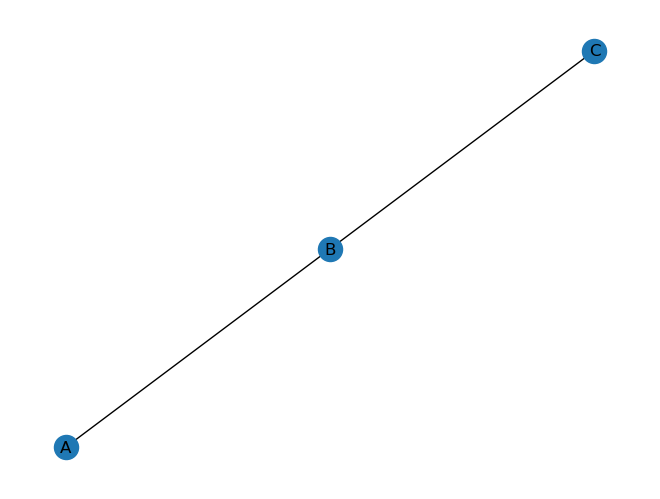

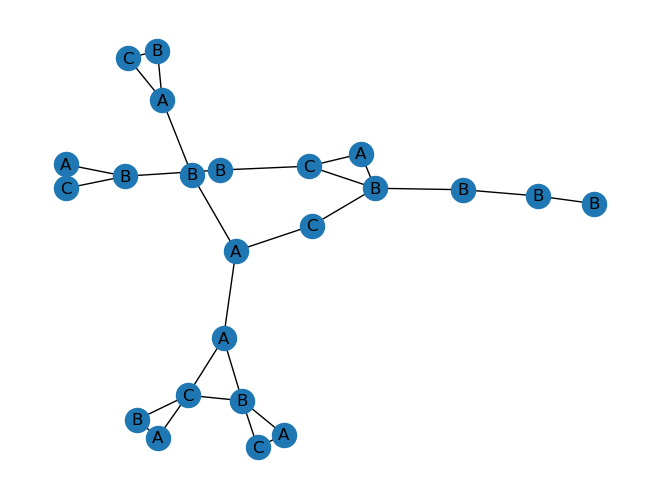

{1: 1, 2: 2, 3: 3}
{1: 1, 2: 2, 5: 3}
{8: 1, 9: 2, 10: 3}
{11: 1, 12: 2, 10: 3}
{11: 1, 12: 2, 13: 3}
{14: 1, 12: 2, 13: 3}
{14: 1, 12: 2, 10: 3}
{17: 1, 16: 2, 15: 3}
{21: 1, 19: 2, 20: 3}
The MIS support for pattern [1, 2, 3] in G is: 9.000000


In [8]:
from networkx.algorithms import isomorphism

# Example pattern
P = nx.Graph()
P.add_nodes_from([(1,{"label":"A"}), (2,{"label":"B"}), (3,{"label":"C"})])
P.add_edges_from([(1,2),(2,3)])
labels = nx.get_node_attributes(P, 'label') 
plt.figure(1)
nx.draw(P,labels=labels)

# Example graph
G = nx.read_gml("data/graph.gml", label='id')
labels = nx.get_node_attributes(G, 'label') 
pos = nx.spring_layout(G)
plt.figure(2)
nx.draw(G,pos, labels=labels)

plt.show()

# Find the matches of P in G
nm = isomorphism.GraphMatcher(G,P,node_match=isomorphism.categorical_node_match("label", "A"))
matches = []
for subgraph in nm.subgraph_monomorphisms_iter():
    matches.append(subgraph)
    print(subgraph)
    
print("The MIS support for pattern %s in G is: %f" %(P.nodes, mis_support(P, matches)))


In [ ]:
### EXTRA CODE BLOCK HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 2: Frequent itemsets (25 Points)
We have learned the Apriori and FP-Growth algorithms for mining frequent itemsets. In this part, we will implement these algorithms and test them against each other. 

We will use the anonymized real-world `retail market basket` data from: http://fimi.ua.ac.be/data/.
This data comes from an anonymous Belgian retail store, and was donated by Tom Brijs from Limburgs Universitair Centrum, Belgium. The original data contains 16,470 different items and 88,162 transactions. You may only work with the top-50 items in terms of occurrence frequency.
_Hint:_ We have used this dataset before.

The variable **retail_small** contains the top-50.

In [2]:
from utilities.load_data import load_market_basket


def filter_transactions(T, k=50):
    """
        Keep only the top k items in the transactions.
        Remove transactions that become empty.
    """
    # Count occurences of each item
    counts = [0] * 16470
    for t in T:
        for i in t:
            counts[i] += 1

    # Sort and select top k
    counts = np.array(counts)
    order  = np.argsort(counts)[::-1] # reverse the sorted order

    indexes_to_keep = order[:k]       # Keep the top k items
    index_set = set(indexes_to_keep)  # Convert to python set for efficiency

    # Filter transactions
    T_new = [t_ for t_ in  [list(filter(lambda i: i in index_set, t)) for t in T]  if t_]
    return T_new

retail = load_market_basket()
retail_small = filter_transactions(retail)

## Task 2.1 Association Rules (4 Points)
Consider the following table

| transaction ID 	| Items           	|
|----------------	|-----------------	|
| 1              	| Ape,Cat,Dog,Cow     	|
| 2              	| Cat,Dog,Pig,Cow 	|
| 3              	| Dog,Bat,Pig,Cow 	|
| 4              	| Dog,Pig,Cow     	|
| 5              	| Dog,Cow         	|
| 6              	| Cat,Cow         	|
| 7              	| Ape,Bat,Fox     	|
| 8              	| Ape,Cow         	|
| 9              	| Ape,Dog,Cow     	|


### Task 2.1.1 (0.5 Points)
<span style='color: green'>**\[Motivate\]**</span> What is the count of the itemset {Dog,Pig,Cow} ?

*******************
$s({Dog,Pig,Cow})=3$ 
******************

### Task 2.1.2 (0.5 Points)
<span style='color: green'>**\[Motivate\]**</span>What is the support and confidence of the association rule {Dog,Pig}->Cow ?

*******************
$$s = \frac{\sigma(Dog,Pig,Cow)}{|T|} = \frac{3}{9} = \frac{1}{3} $$
$$c = \frac{\sigma(Dog,Pig,Cow)}{\sigma(Dog,Pig)} = \frac{3}{3} = 1$$

******************

### Task 2.1.3 (1.5 Point)
<span style='color: green'>**\[Compute by hand\]**</span> Consider the application of the Apriori algorithm to find all the frequent itemsets
whose counts are at least 3.

*******************
$k=1$
$$s(\{Ape\}) = 4$$
$$s(\{Bat\}) = 2$$
$$s(\{Cat\}) = 3$$
$$s(\{Cow\}) = 8$$
$$s(\{Dog\}) = 6$$
$$s(\{Pig\}) = 3$$
Bat does not have the minimum support required, so we can prune all future possible itemsets containing it. <br>
$k=2$
$$s(\{Ape,Cat\}) = 1$$
$$s(\{Ape,Cow\}) = 3$$
$$s(\{Ape,Dog\}) = 2$$
$$s(\{Ape,Pig\}) = 0$$
$$s(\{Cat, Cow\}) = 3$$
$$s(\{Cat, Dog\}) = 2$$
$$s(\{Cat, Pig\}) = 1$$
$$s(\{Cow, Dog\}) = 6$$
$$s(\{Cow, Pig\}) = 3$$
$$s(\{Dog, Pig\}) = 3$$
The itemsets $\{Ape,Cat\}, \{Ape, Dog\}, \{Ape, Pig\}, \{Cat,Dog\}, \{Cat,Pig\}$ do not have the minimum count, so they will be pruned. 
The itemsets left are : $\{Ape, Cow\}, \{Cat, Cow\}, \{Cow,Dog\}, \{Cow,Pig\},\{Dog,Pig\}$
$$s(\{Cow,Dog,Pig\})=3$$
This is now the only itemset left that could be frequent. The reason why $\{Ape,Cow,Cat\}$ or $\{Cat,Cow,Dog\}$ cannot be frequent is because they too are pruned when $\{Ape, Cat\}$ and $\{Cat, Dog\}$ are pruned. 
******************

### Task 2.1.4 (1.5 Point)
<span style='color: green'>**\[Compute by hand\]**</span> Find all the association rules with support at least 1/3 and confidence at least 1/2.


*******************
The only rules that can have support at least $\frac{1}{3}$ are the ones that have count at least 3. 
This makes the candidate association rules:
$\{Ape, Cow\}, \{Cat, Cow\}, \{Cow,Dog\}, \{Cow,Pig\},\{Dog,Pig\}$ and $\{Cow,Dog,Pig\}$. <br>
Now, we need to account for their confidence. As confidence does not have an antimonotonicity property, so we have to check for a lot of rules. 
We know from earlier that $\{Dog,Pig\} \rightarrow \{Cow\}$ passes the confidence threshold. Let's check for the other rules.

$$c(\{Cow\} \rightarrow \{Dog,Pig\}) = \frac{3}{8} $$
$$c(\{Dog\} \rightarrow \{Cow,Pig\}) = \frac{3}{6} = \frac{1}{2}$$
$$c(\{Pig\} \rightarrow \{Cow,Dog\}) = \frac{3}{3} = 1$$
$c(\{Cow\} \rightarrow \{Dog,Pig\})$ does not satisfy the minimum confidence. We know due to rules that because $\{Pig\} \rightarrow \{Cow,Dog\}$ and $\{Dog\} \rightarrow \{Cow,Pig\}$ satisfy the confidence needed, so will $\{Cow, Pig\} \rightarrow \{Dog\}$ and $\{Dog,Cow\} \rightarrow \{Pig\}$, as they have to have a larger confidence. 

$$c(\{Cow\} \rightarrow \{Pig\}) = \frac{3}{8} $$
$$c(\{Pig\} \rightarrow \{Cow\}) = \frac{3}{3} = 1$$

$$c(\{Cow\} \rightarrow \{Dog\}) = \frac{6}{8} = \frac{3}{4}$$
$$c(\{Dog\} \rightarrow \{Cow\}) = \frac{6}{6} = 1$$

$$c(\{Dog\} \rightarrow \{Pig\}) = \frac{3}{6} = \frac{1}{2}$$
$$c(\{Pig\} \rightarrow \{Dog\}) = \frac{3}{3} = 1$$

The same line of reason could have been applied as previous, if this was done before the previous step. <br>
Now, let's check for the remaining itemsets. 

$$c(\{Ape\} \rightarrow \{Cow\}) = \frac{3}{4} $$
$$c(\{Cow\} \rightarrow \{Ape\}) = \frac{3}{8} $$

$$c(\{Cat\} \rightarrow \{Cow\}) = \frac{3}{3} = 1$$
$$c(\{Cow\} \rightarrow \{Cat\}) = \frac{3}{8} $$

So, in general all the association rules that have at least $\frac{1}{3}$ support and $\frac{1}{2}$ confidence are:
$\{Dog,Pig\} \rightarrow \{Cow\}$, $\{Dog\} \rightarrow \{Cow,Pig\}$, $\{Pig\} \rightarrow \{Cow,Dog\}$, $\{Cow, Pig\} \rightarrow \{Dog\}$, $\{Dog,Cow\} \rightarrow \{Pig\}$, $\{Pig\} \rightarrow \{Cow\}$, $\{Cow\} \rightarrow \{Dog\}$, $\{Dog\} \rightarrow \{Cow\}$, $\{Dog\} \rightarrow \{Pig\}$, $\{Pig\} \rightarrow \{Dog\}$, $\{Ape\} \rightarrow \{Cow\}$, $\{Cat\} \rightarrow \{Cow\}$. 



******************

## Task 2.2 A Priori algorithm (9 Points)

### Task 2.2.1(7 Points)
<span style='color: green'>**\[Implement\]**</span> Develop an implementation of the Apriori algorithm. You can look at your implementation from the exercises (note that this one is slightly different to simplify comparison with FP-Growth).

In [3]:
def apriori_algorithm(T, min_support=10):
    """
        Apriori algorithm for mining frequent itemsets and association rules. 
        This implementation should just find frequent itemsets, and ignore the rule generation.
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     int: The total number of occurences needed for an itemset to be considered frequent
        
        Outputs:
            itemsets:        Dictionary of with keys as frequent itemset, and value as the total count of this itemset 
    """
    itemsets = dict()
    #search for 1-itemsets
    for transaction in T:
        for item in transaction:
            key = tuple([item])
            if key in itemsets:
                itemsets[key] += 1
            else:
                itemsets[key] = 1
    #remove infrequent 1-itemsets
    itemsets = {k: v for k, v in itemsets.items() if v >= min_support}
    #search for k-itemsets (k>1)
    candidates = compute_candidates(set(itemsets.keys()))
    while len(candidates) != 0:
        itemsets_k = dict()
        for transaction in T:
            for c in candidates:
                if set(c).issubset(set(transaction)):
                    if c in itemsets_k:
                        itemsets_k[c] += 1
                    else:
                        itemsets_k[c] = 1
        itemsets_k = {k: v for k, v in itemsets_k.items() if v >= min_support}
        candidates = compute_candidates(set(itemsets_k.keys()))
        itemsets.update(itemsets_k)
    return itemsets

def compute_candidates(prev_itemset):
    Ck = set()
    # Join step
    for itemset in prev_itemset:
        its1 = tuple(sorted(itemset))
        for itemset2 in prev_itemset:
            its2 = tuple(sorted(itemset2))
            if its1[:-1] == its2[:-1]:
                if its1[-1] < its2[-1]: Ck.add(its1 + its2[-1:])

    # Pruning step
    to_remove = set()
    for c in Ck:
        for subset in combinations(c, len(c)-1):
            if not subset in prev_itemset:
                to_remove.add(c)
                break
    for c in to_remove:
        Ck.remove(c)
    
    return Ck

### Task 2.2.2 (2 Points)
<span style='color: green'>**\[Implement\]**</span> Run Apriori on the data-set (using the **retail** variable and not the small one). Try a few different values of min_support. </br>
<span style='color: green'>**\[Describe\]**</span>Roughly how large does min_support need to be before no itemsets of size 2 are found? (You don't need to find the excact value. Nearest 1000 is fine).

Note that the dataset is reasonably large, so this **can take up a large amount of time depending on your value of min support and implementation.**

In [5]:
print(apriori_algorithm(retail, 5000))
print(apriori_algorithm(retail, 50000))
print(apriori_algorithm(retail, 29000))
print(apriori_algorithm(retail, 30000))

{(32,): 15167, (38,): 15596, (39,): 50675, (41,): 14945, (48,): 42135, (38, 39): 10345, (39, 41): 11414, (38, 48): 7944, (39, 48): 29142, (41, 48): 9018, (32, 39): 8455, (32, 48): 8034, (38, 39, 48): 6102, (39, 41, 48): 7366, (32, 39, 48): 5402}
{(39,): 50675}
{(39,): 50675, (48,): 42135, (39, 48): 29142}
{(39,): 50675, (48,): 42135}


******************
As the support for the most frequent 2-itemset $\{39,48\}$ is $29142$, the minimal support for no 2-itemsets to be found, rounded to the nearest thousand, is $30000$.
******************

## Task 2.3 FP-Growth (9 Points)

### Task 2.3.1 (7 Points)
<span style='color: green'>**\[Implement\]**</span> Complete the implementation of FP-Growth below. You only need to implement growing the tree and building the header table. It is clearly marked where you need to implement.

In [6]:

class FP_Tree:
    def __init__(self, T, min_support=10):
        """
        Constructor for FP_Tree. Should correctly build an FP-Tree with header table.
        Hint: I strongly advise you to implement the missing sections of the Node class before this one
        
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     The total number of occurences needed to keep the itemset.
        """
        self.min_support    = min_support
        self.header_table   = {}
        self.root           = Node(header_table = self.header_table)
        
        #count frequency of each item
        items = dict()
        for transaction in T:
            for item in transaction:
                if item in items:
                    items[item] += 1
                else:
                    items[item] = 1
        self.items = items

        #order transactions by frequency
        for transaction in T:
            transaction = [item for item in transaction if items[item] >= min_support]
            item_indices = {item: index for index, item in enumerate(sorted(set(transaction)))}
            transaction = sorted(transaction, key=lambda x: (items[x], item_indices[x]), reverse=True)
            self.root.add_path(transaction)
    
    
    ### Common functions for FP-tree and Conditional FP-tree
    ### You do not need to modify the rest of this class
    def generate_pattern(self, keys, support):
        return tuple(keys + self.get_suffix()), support
    
    def get_suffix(self):
        return []
    
    # This is the main function for generating frequent itemsets. You do not need to modify this,
    # but I recommend reading and trying to understand it.
    def mine_frequent_itemsets(self, res=None):
        if res is None: res = []
        
        if self.root.is_single_path():
            keys = list(self.header_table.keys())
            key_idx = {k:i for i, k in enumerate(keys)}
            counts = [self.header_table[k].count for k in keys]
            
            for key_pair in itertools.chain(*[itertools.combinations(keys, k) for k in range(1, len(keys)+1)]):
                support = min([counts[key_idx[k]] for k in key_pair])
                if support >= self.min_support: 
                    res.append(self.generate_pattern(list(key_pair), support))
         
        else: # Not single path
            for key, node in self.header_table.items():
                support = node.support()
                
                if support >= self.min_support:
                    res.append( self.generate_pattern([key], support) )
                
                basis = []
                while node is not None:
                    curr_node = node
                    node = node.nodelink
                    
                    if curr_node.parent is None:  continue
                        
                    path = curr_node.path(limit=curr_node.count)[:-1]
                    if len(path) == 0:  continue
                        
                    basis.append( path )
                    
                if len(basis) == 0: continue
                    
                conditional_tree = Conditional_FP_Tree(self.min_support, [key] + self.get_suffix(), basis)
                if conditional_tree.root is None: continue
                    
                conditional_tree.mine_frequent_itemsets(res=res)
        return res


# You don't need to modify anything in this class
class Conditional_FP_Tree(FP_Tree):
    def __init__(self, min_support, suffix, basis): 
        self.min_support    = min_support
        self.suffix         = suffix
        self.header_table   = {} # This will hold all unique items
        
        self.root           = Node(header_table=self.header_table)
        
        self.build_tree(basis)
        # self.root           = prune(self.root, min_support)
        if self.root is None: print("WARNING: root is empty after pruning")
        
    def build_tree(self, basis):
        for b in basis:
            count = b[0][1]
            path = list(map(lambda x: x[0], b))
            for i in range(count):
                self.root.add_path(path)
    
    def get_suffix(self):
        return self.suffix

class Node:
    def __init__(self, header_table, value=None, parent=None, path=None):
        """
        Constructor for Node class, which is used for the FP-Tree. 
        Inputs:
            header_table:    Dict. Should be same dict for all nodes in the tree
            value:           Integer id of the item the node represents
            parent:          Parent Node. None if root node
            path:            List of node values for a path that should start in this node.
        """
        
        self.children     = {}
        self.header_table = header_table 
        self.nodelink     = None
        self.value        = None
        self.parent       = None
        self.count        = 0
        
        if value is not None: # Only root node should have None as value
            self.value          = value
            self.parent         = parent
            # YOUR CODE HERE
            self.count = 1
            if value in self.header_table:
                node = self.header_table[value]
                while node.nodelink is not None:
                    node = node.nodelink
                node.nodelink = self
            else:
                self.header_table[value] = self
            # YOUR CODE HERE
        if path is not None: 
            self.add_path(path)
            
    
    def add_path(self, path):
        """
        Function for adding a path to tree. 
        Should follow an existing path and increment count while such a path exists. 
        If no path exists (or only partial path exists), this function should create or complete such a path
        Hint: Recursion might be helpful.
        Inputs:
            path:            A list node values. 
                             Example: path = [1, 2, 5]
        """
        
        ### YOUR CODE
        if len(path) == 0:
            return
        if path[0] in self.children:
            child = self.children[path[0]]
            child.count += 1
        else:
            child = Node(header_table=self.header_table, value=path[0], parent=self)
            self.children[path[0]] = child
        child.add_path(path[1:])
        return
        ### YOUR CODE
    
    
    # Functions for frequent items-sets and rule mining below. You do not need to modify these
    def is_single_path(self):
        if   len(self.children) == 0: return True 
        elif len(self.children) >  1: return False
        else:  # len == 1
            key = next((k for k in self.children.keys()))
            return self.children[key].is_single_path()
    
    def support(self, verbose=False):
        if verbose: print("Counting support, this value is ", self.value, " with count ", self.count, " and parent ", self.parent.value)
            
        if self.nodelink is not None: return self.count + self.nodelink.support(verbose)
        else:                         return self.count
    
    def path(self, limit=-1):
        if self.value is None: 
            return []
        else:                  
            count = self.count if limit == -1 else min(self.count, limit)
            return self.parent.path(limit=limit) + [(self.value, count)]
    
    def print(self, indent="", spacing="----|-"):
        print(indent + str(self.value) + ":" + str(self.count))
        for v in self.children.values():
            v.print(indent=indent + spacing)


### Task 2.3.2 (2 Points)
<span style='color: green'>**\[Implement\]**</span> Run FP-Growth on the data-set (using the **retail** variable and not the small one). Try a few different values of min_support. </br>
<span style='color: green'>**\[Describe\]**</span> Roughly how large does min_support need to be before all itemsets of size 1 and 2 are found but no itemsets of size 3? (You don't need to find the excact value. Nearest 1000 is fine)

In [8]:
### YOUR CODE HERE
print(FP_Tree(retail_small, 5000).mine_frequent_itemsets())
print(FP_Tree(retail_small, 7500).mine_frequent_itemsets())



[((32,), 15167), ((39, 32), 8455), ((48, 32), 8034), ((39, 48, 32), 5402), ((39,), 50675), ((38,), 15596), ((39, 38), 10345), ((48, 38), 7944), ((39, 48, 38), 6102), ((41,), 14945), ((39, 41), 11414), ((48, 41), 9018), ((39, 48, 41), 7366), ((48,), 42135), ((39, 48), 29142)]
[((32,), 15167), ((39, 32), 8455), ((48, 32), 8034), ((39,), 50675), ((38,), 15596), ((39, 38), 10345), ((48, 38), 7944), ((41,), 14945), ((39, 41), 11414), ((48, 41), 9018), ((48,), 42135), ((39, 48), 29142)]


**********************
The largest support of an itemset of size 3 is 7366 for (39,48,41), so after running with a minimum support value larger than 7366, no itemsets of size 3 appear, but the frequent itemsets of size 2 are found.  
**********************

## Task 2.4 Comparing A priori and FP-Growth (3 Points)
<span style='color: green'>**\[Describe\]**</span> Run the given experiment and show to what extent FP-Growth has an advantage. Comment on the results. What do you see? What do you expect to see?

In [9]:
# Script for testing the runtime of your algorithms. 
# WARNING: This will take a reasonably long time to run.

import numpy as np
import time
    
def sample(n=200, alphabet_size=5):
    candidates  = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])[:alphabet_size]
    m = candidates.shape[0]
    
    T = []
    for i in range(n):
        size = int(np.random.rand() * (m)) + 1
        T.append(list(candidates[np.random.permutation(m)[:size]]))
        
    return T

def test():
    # If you want to test it quickly, you can modify "transaction_lengths" and "alphabet_sizes" temporarily. 
    # This will give you errors in the plotting (next code cell) though.
    # Make sure you use the original values for "transaction_lengths" and "alphabet_sizes" for your final version.
    transaction_lengths = [2**i for i in range(4, 11)]
    alphabet_sizes      = [3, 6, 9, 12] 
    
    min_support = 10
    repeats     = 10
    
    stop = False
    results = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    stderrs = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    
#     print(results.shape)
    
    for i, n in enumerate(transaction_lengths):
        for j, a in enumerate(alphabet_sizes):
            print(" - - " * 4, "n=%d,a=%d" % (n, a), " - - " * 4)
            times = []
            for _ in range(repeats):
                T = sample(n, a)

                t0 = time.time()
                tree = FP_Tree(T, min_support=min_support)
                frequent_itemsets = tree.mine_frequent_itemsets()
                t1 = time.time() - t0

                i1 = {tuple(sorted(list(k))): v for k, v in frequent_itemsets}

                t0 = time.time()
                itemsets = apriori_algorithm(T, min_support=min_support)
                t2 = time.time() - t0

                #print(itemsets)
                #print(frequent_itemsets)
                i2 = {}
                for k, v in itemsets.items():
                    i2[tuple(sorted(list(k)))] = v

                assert len(i1) == len(i2)
                for k in i1.keys():
                    assert i1[k] == i2[k]

                times.append([t1, t2])

            results[i, j] = np.mean(times, axis=0)
            stderrs[i, j] = np.std(times, axis=0)
            print(np.mean(times, axis=0), "+-", np.std(times, axis=0), "\n")
            
    np.save('itemsets_runningtimes', results)  # Results are saved to avoid having to run it again if plot code needs changing
    np.save('itemsets_stderr', stderrs)
    
    return results, stderrs
        
results, stderrs = test()     



 - -  - -  - -  - -  n=16,a=3  - -  - -  - -  - - 
[0.00080009 0.00030019] +- [0.0006013  0.00045855] 

 - -  - -  - -  - -  n=16,a=6  - -  - -  - -  - - 
[0.00159986 0.00060356] +- [0.00190735 0.00066767] 

 - -  - -  - -  - -  n=16,a=9  - -  - -  - -  - - 
[0.00550005 0.00079813] +- [0.00476012 0.00074525] 

 - -  - -  - -  - -  n=16,a=12  - -  - -  - -  - - 
[0.01150064 0.00119798] +- [0.02533809 0.00087052] 

 - -  - -  - -  - -  n=32,a=3  - -  - -  - -  - - 
[0.00270331 0.0009968 ] +- [1.09826055e-03 6.93503052e-06] 

 - -  - -  - -  - -  n=32,a=6  - -  - -  - -  - - 
[0.01496201 0.00818253] +- [0.00723774 0.00268625] 

 - -  - -  - -  - -  n=32,a=9  - -  - -  - -  - - 
[0.07990108 0.05078769] +- [0.0190647  0.02834387] 

 - -  - -  - -  - -  n=32,a=12  - -  - -  - -  - - 
[0.26619744 0.09777877] +- [0.08832736 0.06424025] 

 - -  - -  - -  - -  n=64,a=3  - -  - -  - -  - - 
[0.00140083 0.00129638] +- [0.00049083 0.00046025] 

 - -  - -  - -  - -  n=64,a=6  - -  - -  - -  - - 
[0.

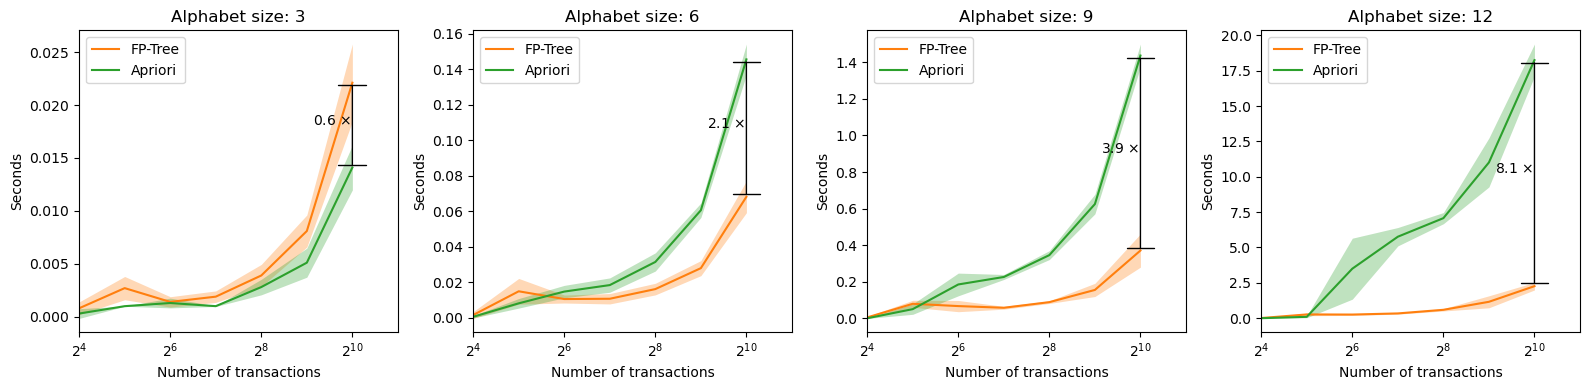

In [10]:
import matplotlib.pyplot as plt

results = np.load('itemsets_runningtimes.npy')
stderrs = np.load('itemsets_stderr.npy')

# Plotting 
transaction_lengths = [2**i for i in range(4, 11)]
alphabet_sizes      = [3, 6, 9, 12] 

n, a, _ = results.shape
res_to_plot = np.transpose(results, (1, 0, 2))
err_to_plot = np.transpose(stderrs, (1, 0, 2))

fig, ax = plt.subplots(1, a, figsize=(4*a, 4))
for i, (res, err) in enumerate(zip(res_to_plot, err_to_plot)):
    ax[i].plot(transaction_lengths, res[:,0], label='FP-Tree', color='C1')
    ax[i].fill_between(transaction_lengths, res[:,0] - err[:,0], res[:,0] + err[:,0], alpha=0.3, linewidth=0 , color='C1')
    
    x = transaction_lengths[-1]
    ax[i].set_xlim((2**4, 2**11))
    ax[i].annotate(text='', xy=(x, res[-1,0]), xytext=(x,res[-1,1]), arrowprops=dict(arrowstyle='|-|'))
    ax[i].annotate(text='%.1f $\\times$'%(res[-1,1]/res[-1,0]), xy=(x-24,  (res[-1,1] / 2 + res[-1,0]/2)), horizontalalignment='right')
    
    ax[i].plot(transaction_lengths, res[:,1], label='Apriori', color='C2')
    ax[i].fill_between(transaction_lengths, res[:,1] - err[:,1], res[:,1] + err[:,1], alpha=0.3, linewidth=0 , color='C2')
    
    ax[i].set_title("Alphabet size: %d" % alphabet_sizes[i])
    ax[i].set_xscale('log', base=2)
    ax[i].legend()
    ax[i].set_xlabel('Number of transactions')
    ax[i].set_ylabel('Seconds')

plt.tight_layout()
    

*******************
Comment on the results. What do you see? What do you expect to see?
As the alphabet size and the number of transactions grows, FP-Growth becomes much faster than Apriori. I would expect a larger alphabet would have a larger effect on the Apriori algorithm, because it works in the way that all possible itemsets are generated and are then pruned if some constituent itemset is not frequent. This makes its complexity much more easily influenced by the size of the alphabet than FP-Growth, although there are other factors influencing its complexity. This hypothesis is confirmed in the pictures. We can observe that, at the beginning, the running time of the algorithms is kind of close, as FP-Trees take a long time to construct, but as the alphabet increases, the difference becomes more noticeable. <br>
When it comes to the number of transactions, I would expect the main reason for the difference there is that FP-Growth pays the price of constructing the FP-Tree over the large transactional data once, and then goes about its ways, while Apriori pays for the large number of transactions in each step basically, while it's counting support the k-itemsets. In this way, the difference gets bigger as the number of transactions gets higher.<br>
When both of these factors are combined the large difference on the last picture makes perfect sense. 
******************

# Part 3: Sequence Segmentation and LSH (30 Points)
The Dynamic Programming algorithm for optimally segmenting a sequence $S$ of length $n$ 
into $B$ segments, that we have introduced, is expressed by the following recursive equation:

$$
E(i, b) = \min_{j < i}\left[ E(j, b-1) + Err(j+1, i)\right]
$$

where $Err(j+1, i)$ is the error of a segment that contains items from $j+1$ to $i$.

In this part, you will have to answer some questions on this.

**Note:** 
For those of you, who are not used to analyzing algorithms: by time-complexity and space-complexity, 
we refer to the theoretical computation time and memory usage, respectively, as a function of the problem size, i.e., as a 
function of $n$ and $B$ in Problem 3. We use [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation)
to specify this. You should **not** infer it by implementing it in practice ;-) 
Again, when in doubt, ask on Discord, Blackboard or shoot Jon an email. 

## Task 3.1 Sequence segmentation (20 Points)

************
<span style='color: red'>**These questions are hard. First complete the rest of the exercises and then come back to solve 3.1.**</span>
************


### Task 3.1.1
<span style='color: green'>**\[Describe\]**</span> what is the default space-complexity of this algorithm?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.2 
<span style='color: green'>**\[Describe\]**</span> what happens if we are willing to recompute some tabulated results. Can we then reduce the default space-complexity? _Exactly how_? What is the space-complexity then?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.3 
<span style='color: green'>**\[Motivate\]**</span> what is the cost of using the space-efficiency technique described in Task 3.1.2 in terms of time-complexity.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.4 
For the sub-problem of segmenting the $i$-prefix of sequence $S$ into $b$ segments, consider 
    the segment $M(i, b)$ that contains (if such segment exists) the middle item of 
    index $\lfloor \frac{n}{2} \rfloor$. The boundaries of $M(i, b)$ can be detected and tabulated 
    along with each $E(i, b)$ solution. 

<span style='color: green'>**\[Describe\]**</span> a method that reduces the time-complexity burden identified in Task 3.1.3, based on the above observarion. 
    _(hint: use [divide-and-conquer](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm))_

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.5 
<span style='color: green'>**\[Motivate\]**</span> what is the time complexity when using the technique proposed in Task 3.1.4?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 3.2 Min Hashing (6 Points)

In this exercise we will see the **One-pass implementation** of the MinHash signatures.<br>

### Task 3.2.1 
<span style='color: green'>**\[Implement\]**</span> Implement the One-pass algorithm for the MinHash Signatures (and the jaccard simmilarity matrix).

In [11]:
#C is the Input Matrix (Shingles x Documents)
#J_sim is a jaccard similarity matrix (Documents x Documents)
def jaccard_simmilarity_matrix(C):
    J_sim = np.zeros((C.shape[1], C.shape[1]))
    for i in range(C.shape[1]):
        for j in range(i, C.shape[1]):
            j_similarity = len(set(C[:,i]).intersection(set(C[:,j]))) / len(set(C[:,i]).union(set(C[:,j])))
            J_sim[i,j] = j_similarity
            J_sim[j,i] = j_similarity
    return J_sim

#C is the Input Matrix (Shingles x Documents)
#no_of_permutations is the how many permutations we will use
#C_new is the Output Matrix (no_of_permutations x Documents)
def one_pass_hashing(C, no_of_permutations):
    C_new = None
    ### YOUR CODE STARTS HERE
    np.random.seed()
    hash_function = []
    for _ in range(no_of_permutations):
        hash_function.append(np.random.permutation(C.shape[0]))
    C_new = np.full((no_of_permutations, C.shape[1]), np.inf)
    for i in range(C.shape[1]):
        for j in np.where(C[:, i] == 1)[0]:
            for h, hash_func in enumerate(hash_function):
                if hash_func[j] < C_new[h, i]:
                    C_new[h, i] = hash_func[j]
    ### YOUR CODE ENDS HERE
    return C_new


### Task 3.2.2 

<span style='color: green'>**\[Implement\]**</span> For the matrix below run your implementation for different number of permutations in the range [1,4] and report: a) the Output Matrix C_new and  b) the jaccard similarity matrix of C_new.

In [15]:
### YOUR CODE HERE
#generate different number of permutations in range[1,4]
permutations = [i for i in range(1,5)]
C = [[1,0,0,1],[0,0,1,0],[0,1,0,1],[1,0,1,1],[0,0,1,0]]
for no_of_permutations in permutations:
    C_new = one_pass_hashing(np.array(C), no_of_permutations)
    print("Number of permutations: ", no_of_permutations)
    print("Output matrix: ", C_new)
    print("Jaccard similarity ", jaccard_simmilarity_matrix(C_new))

Number of permutations:  1
Output matrix:  [[0. 4. 1. 0.]]
Jaccard similarity  [[1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 1.]]
Number of permutations:  2
Output matrix:  [[2. 1. 0. 1.]
 [0. 1. 2. 0.]]
Jaccard similarity  [[1.         0.         1.         0.33333333]
 [0.         1.         0.         0.5       ]
 [1.         0.         1.         0.33333333]
 [0.33333333 0.5        0.33333333 1.        ]]
Number of permutations:  3
Output matrix:  [[1. 2. 0. 1.]
 [0. 3. 1. 0.]
 [0. 2. 0. 0.]]
Jaccard similarity  [[1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]
Number of permutations:  4
Output matrix:  [[0. 2. 1. 0.]
 [1. 2. 0. 1.]
 [3. 1. 0. 1.]
 [1. 2. 0. 1.]]
Jaccard similarity  [[1.         0.25       0.66666667 0.66666667]
 [0.25       1.         0.33333333 0.33333333]
 [0.66666667 0.33333333 1.         1.        ]
 [0.66666667 0.33333333 1.         1.        ]]


<span style='color: green'>**\[Motivate\]**</span> Suppose we have 4 documents named as X,Y,Z and W and their signatures are given by the input matrix $C$ as:
$$\begin{matrix} X & Y & Z & W \\1 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & 1 & 1\\0 & 0 & 1 & 0 \end{matrix}$$

*******************
As the number of permutations increases, Jaccard similarity is supposed to be more precise as to determining the similarity between the signed documents. The Jaccard similarity matrix in this case used on the signature matrix shows us that the similarity between Y and X is lower than the similarity between X and W or X and Z. This seems to correspond to the real situation. However, due to a limited number of shingles, I would guess this can only be that precise. This can be observed by looking at the comparison of Y and Z and Y and W. Y has more in common with W, but the Jaccard similarity score is the same for both.  
******************

### Task 3.2.3 
Suppose we have two hash functions (permutations) as <br> $h_1(x) = (x + 1) mod 5$ and $h_2(x)=(3x + 1) mod 5$ 
<span style='color: green'>**\[Describe\]**</span> and <span style='color: green'>**\[Compute by Hand\]**</span> the steps of the one-pass implementation.

*******************
Let's try to implement one-pass on the following matrix
$$\begin{matrix} X & Y & Z & W \\1 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & 1 & 1\\0 & 0 & 1 & 0 \end{matrix}$$
Using the following functions
$$h_1(x) = (x + 1) mod 5$$
$$h_2(x)=(3x + 1) mod 5$$

Our signature matrix will be of the shape 2x4, representing the 2 hash functions and 4 documents. All the 8 values inside it are initialized to infinity. 
Now, we scan each document, starting with X.
X has a 1 in the first row. $$h_1(1)=(0+1) \ mod\ 5=1$$ $$h_2(0)=(0*3+1) \ mod\ 5=1$$. 
We check that $h_1(0) < Sig(X)[0]$ and $h_2(0) < Sig(X)[1]$, and set $Sig(X)[0]$ and $Sig(X)[1]$ to 1.<br>
X also has a 1 in the 4th row. $$h_1(3)=(3+1) \ mod\ 5=4$$ $$h_2(3)=(3*3+1) \ mod\ 5= 10 mod 5 = 0$$.
We check that $h_1(3) < Sig(X)[0]$ and $h_2(3) < Sig(X)[1]$, and set $Sig(X)[1]$ to 0.<br>
We continue with Y. Y has a 1 in the 3rd row. $$h_1(2)=(2+1) \ mod\ 5=3$$ $$h_2(2)=(2*3+1) \ mod\ 5=2$$
We check that $h_1(2) < Sig(Y)[0]$ and $h_2(2) < Sig(Y)[1]$, and set $Sig(Y)[0]=3$ and $Sig(Y)[1]=2$.<br>
We continue with document Z, which has a 1 in the 2nd row. 
$$h_1(1)=(1+1) \ mod \ 5=2$$
$$h_2(1)=(3*3+1) \ mod \ 5=4$$
We check that $h_1(1) < Sig(Z)[0]$ and $h_2(1) < Sig(Z)[1]$, and set $Sig(Z)[0]=2$ and $Sig(Z)[1]=4$.<br>
In document Z the next 1 is in the 4th row, we already know that $h_1(3)=4$ and $h_2(3)=0$.
Now we check that $h_1(3) < Sig(Z)[0]$ and $h_2(3) < Sig(Z)[1]$, and set $Sig(Z)[1]=0$.<br>
The last one in Z is in the 5th row. 
$$h_1(4)=(4+1) \ mod\ 5=0$$
$$h_2(4)=(4*3+1) \ mod\ 5=3$$
We check whether $h_1(4) < Sig(Z)[0]$, and set $Sig(Z)[0]=0$
Now, on to the last document. <br>
Document W has a 1 in the first row, meaning we set its values $Sig(W)[0]$ and $Sig(W)[1]$ to 1.
Its next 1 is in the 3rd row. We know these values are $$h_1(2)=(2+1) \ mod\ 5=3$$ $$h_2(2)=(2*3+1) \ mod\ 5=2$$ and these are not smaller than 1.<br>
The last 1 is in the 4th row, with the values $h_1(3)=4$ and $h_2(3)=0$.
We check $h_1(3) < Sig(W)[0]$ and $h_2(3) < Sig(W)[1]$, thus setting $Sig(W)[1]=0$.
Here is our resulting signature matrix.
$$\begin{matrix} X & Y & Z & W \\1 & 3 & 0 & 1 \\ 0 & 2 & 0 & 0 \end{matrix}$$

******************

## Task 3.3 Locality Sensitive Hashing (4 points)

### Task 3.3.1 

<span style='color: green'>**\[Implement\]**</span> code that evaluate the S-curve $1-(1-s^r)^b$ for $s\in [0,1]$ for the following values of $r$ and $b$ 
1. $r = 3$ and $b = 10$
2. $r = 6$ and $b = 20$
3. $r = 5$ and $b = 50$

You can use, or modify, the helper plotting code below. 

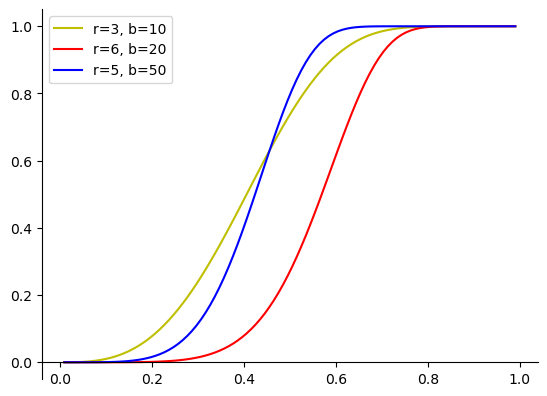

In [20]:
### YOUR CODE HERE
def s_curve(r, b):
    def func(s):
        return 1- (1 - s**r)**b
    return func

### YOUR CODE HERE
x = np.linspace(0.01,0.99,100)
y_3_10 = s_curve(3,10)(x)
y_6_20 = s_curve(6,20)(x)
y_5_50 = s_curve(5,50)(x)


def plot_function(x,ys, colour): 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for y, colour in zip(ys, colour):
        plt.plot(x, y, colour)

    plt.legend(['r=3, b=10', 'r=6, b=20', 'r=5, b=50'])
    # show the plot
    plt.show()
    
plot_function(x,[y_3_10, y_6_20, y_5_50],["y","r","b"])

### Task 3.3.2 

<span style='color: green'>**\[Describe\]**</span> For each of the (r,b) pairs in Task 3.2.1, compute the value of $s$ for which the value of $1-(1-s^r)^b$ is exactly 1/2. How does this value compare with the estimate of $(1/b)^{1/r}$

*******************
Disclaimer: As it did not say compute by hand, I did this on my graphing calculator (TI-84 Plus CE).
$$1- (1 - 0.4060881^3)^{10} \approx 0.5$$
$$1- (1 - 0.56935^6)^{20} \approx 0.5$$
$$1-(1-0.4243945^5)^{50} \approx 0.5 $$
$$|0.4060881 - 0.464158| = 0.0580699$$
$$|0.56935 - 0.60696| = 0.03761$$
$$|0.4243945 - 0.45730| = 0.0329$$
As the value $(1/b)^{1/r}$ is supposed to be able to fairly well approximate the s function, I would expect the similarity in values to be greater. In a range of $[0,1]$, an error of $0.062$ is not that small. While the computational cost might make the use of the approximation much more convenient in some cases, cases where high precision is needed would be well advised to use the exact function. 

******************